<a href="https://colab.research.google.com/github/DongHyukShin93/BigData/blob/main/210617_01_%EC%82%B0%EC%A0%90%EB%8F%84_%EA%B7%B8%EB%9E%98%ED%94%84_%EC%9B%90_%ED%81%AC%EA%B8%B0_%EC%A1%B0%EC%A0%88%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<strong>한글 깨짐 처리하기</strong>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주도의 연령대별 성별 비율을 산점도로 표현하기

남녀 연령별 인구 데이터 scatter() 함수로 표현하기

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 제주특별자치도


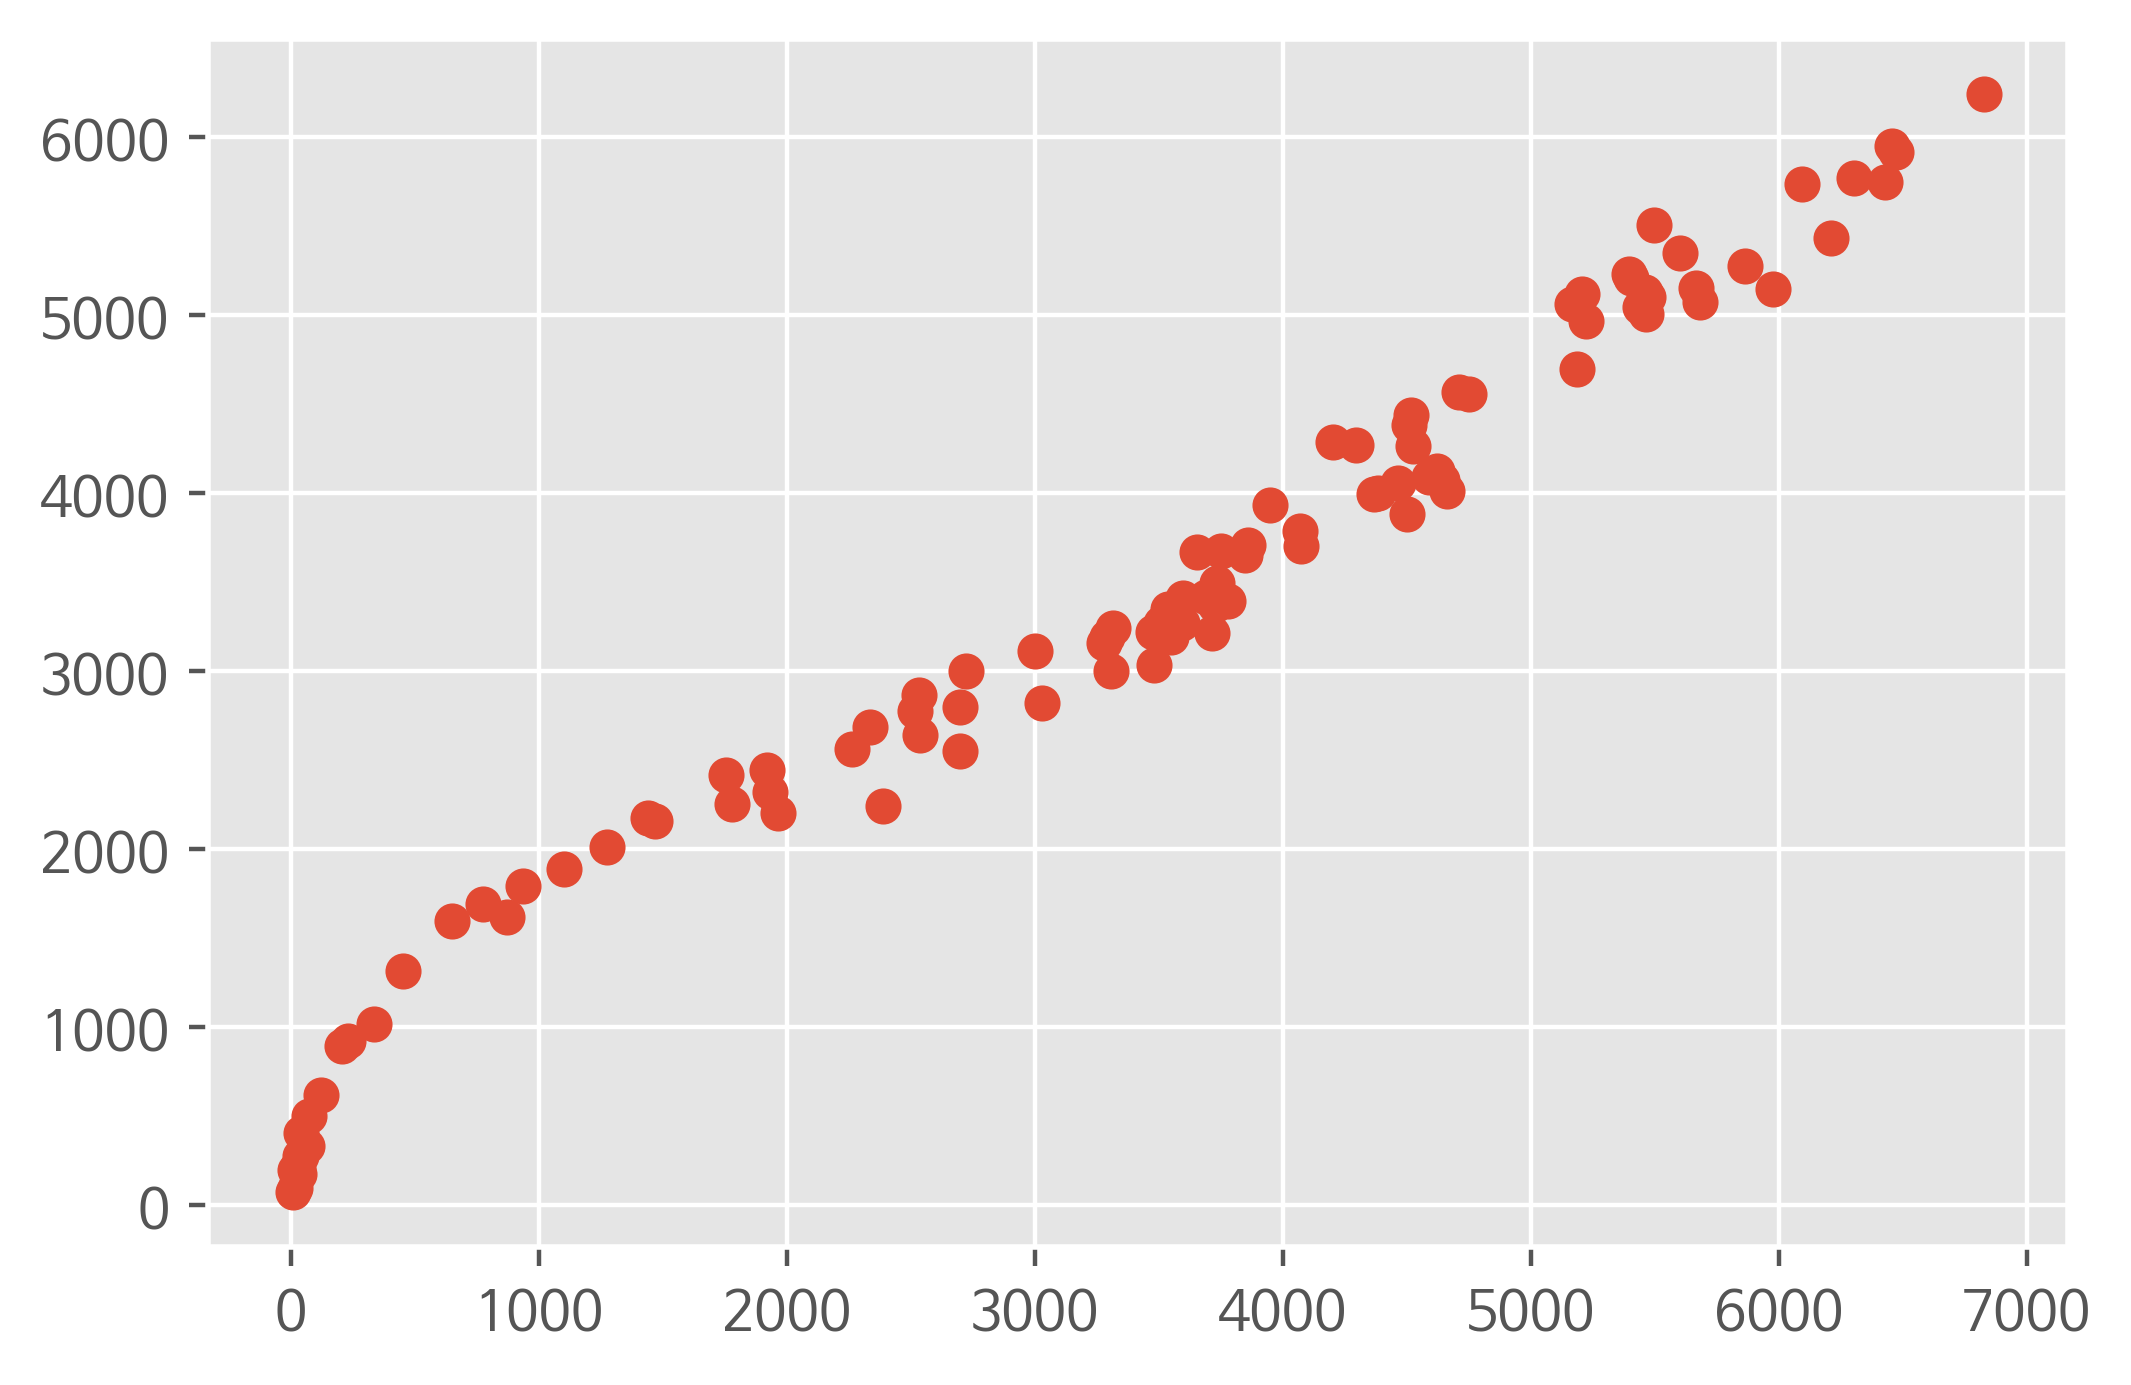

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt

# 파일 열기
f = open("/content/gender.csv", encoding="cp949")
data = csv.reader(f)
# next(data) # 헤더 넘기기

# 지역 명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

# 남자와 여자의 데이터 담을 리스트 생성
m = []
f = []

for row in data :
  if name in row[0] :
    for i in row[3:104] : # 남성 데이터 : 3 ~ 103번 데이터 슬라이싱 -> 정수형으로 변환 -> 리스트에 저장
      m.append(int(i.replace(',','')))
    for j in row[106:] : # 여성 데이터 : 106 ~ 끝까지 데이터 슬라이싱 -> 정수형으로 변환
      f.append(int(j.replace(',','')))
    break # 

# 차트 설정
plt.figure(dpi=200) # 해상도 조절
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리

# 산점도 그래프로 남녀 데이터 표현하기
plt.scatter(m, f) # x축은 남성, y축은 여성
plt.show()

y = x 형태의 추세선 추가하기

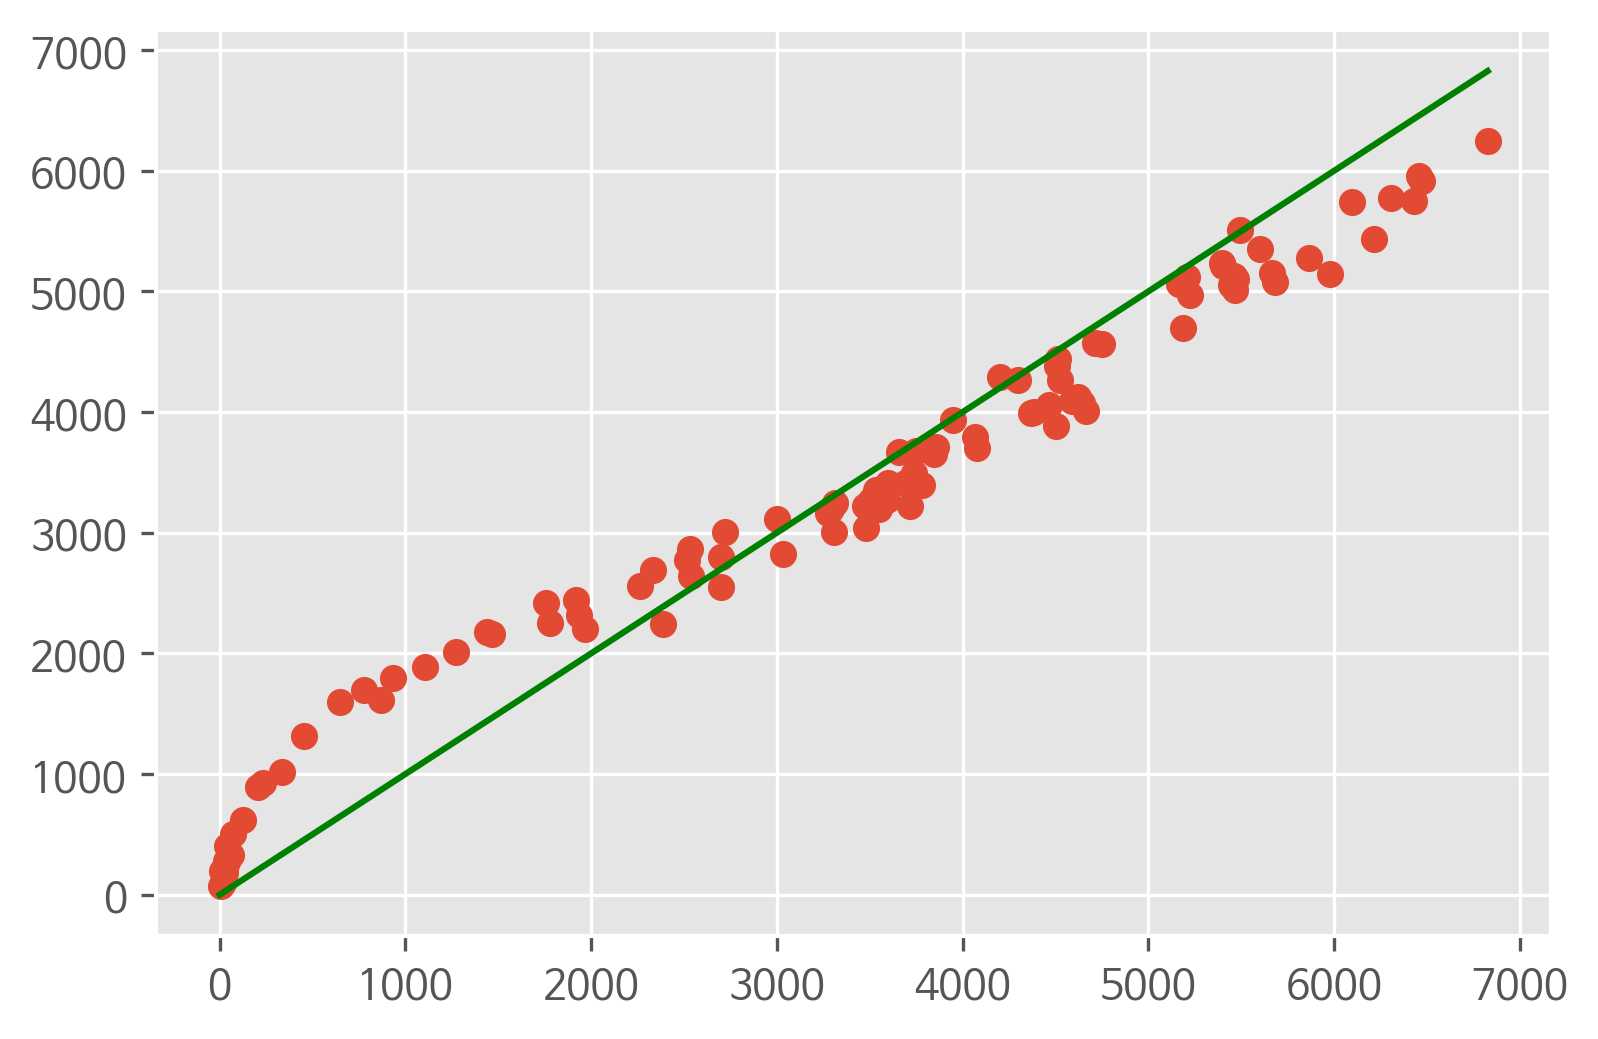

In [ ]:
# 산점도 그래프로 남녀 인구 수 데이터 표현하기
plt.figure(dpi=150)
plt.scatter(m, f)
plt.plot(range(max(m)), range(max(m)), 'g') # 추세선 그리기 # 추세선은 x축 기준으로 그림
plt.show()

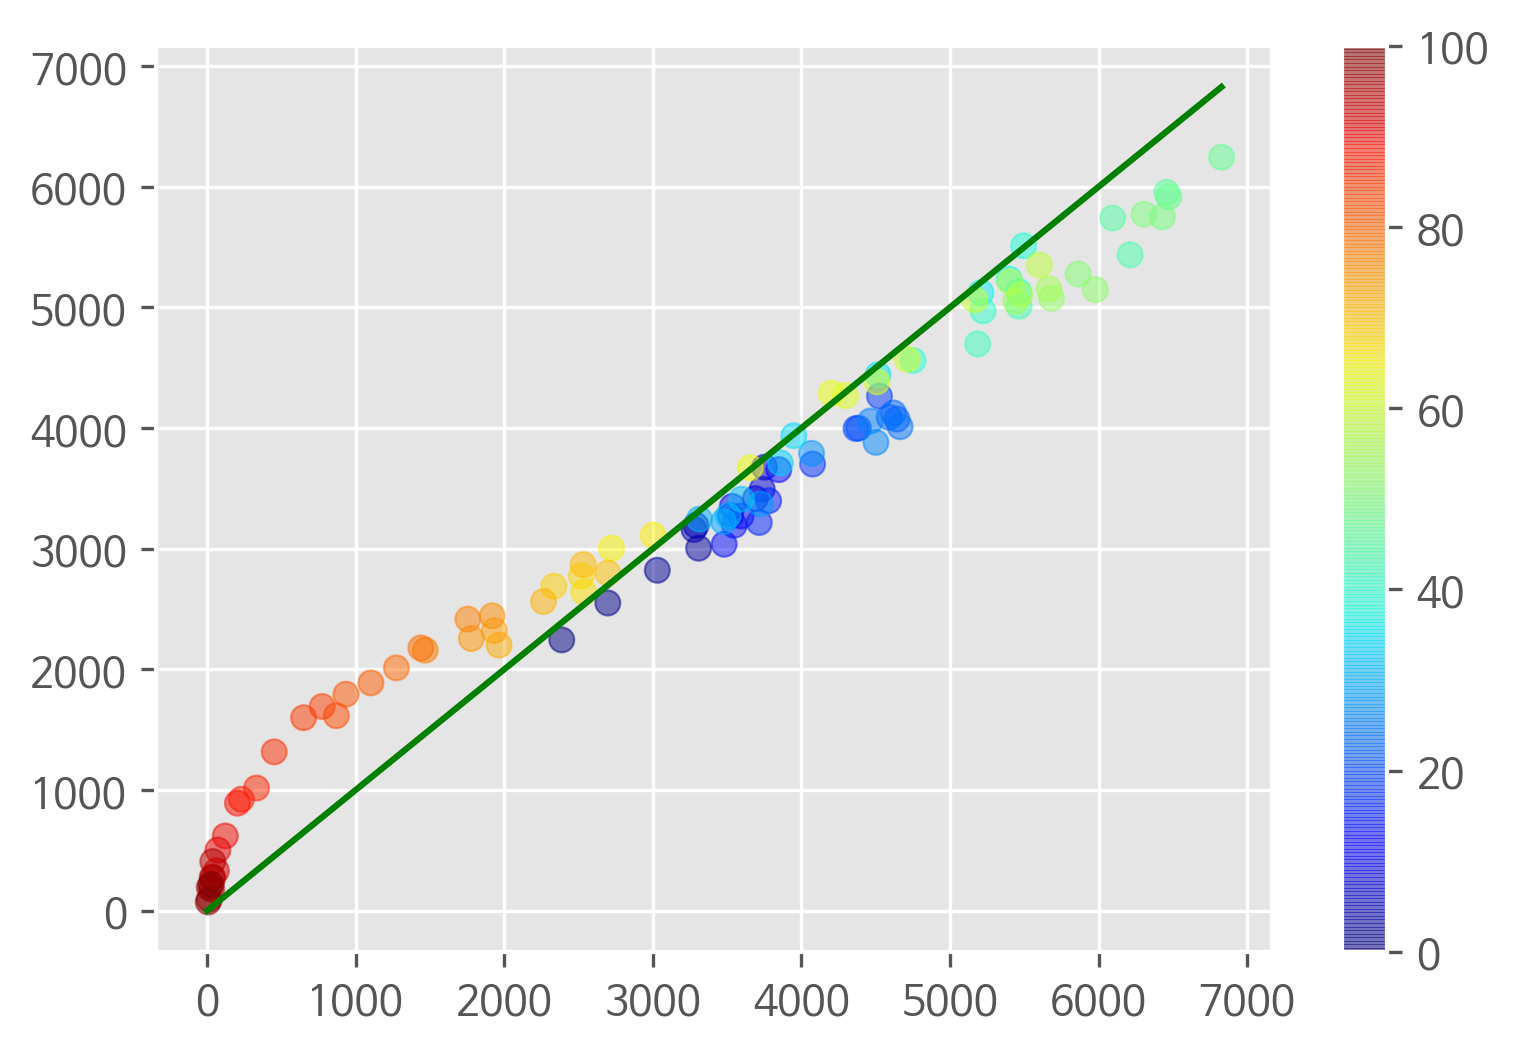

In [ ]:
# 산점도 그래프로 남녀 인구 수 데이터 표현하기
plt.figure(dpi=150)
plt.scatter(m, f, c = range(101), cmap = 'jet', alpha = 0.5)
plt.plot(range(max(m)), range(max(m)), 'g') # 추세선 그리기 # 추세선은 x축 기준으로 그림
plt.colorbar()
plt.show()

원의 크기는 인구수의 제곱근 추가

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 제주특별자치도
[2387, 2697, 3030, 3308, 3277, 3291, 3751, 3690, 3736, 3523, 3535, 3847, 3594, 3480, 3548, 3779, 3716, 4075, 4525, 4367, 4384, 4643, 4590, 4620, 4664, 4464, 4501, 4068, 3725, 3476, 3314, 3507, 3597, 3858, 3949, 4515, 5208, 5398, 5462, 5495, 4751, 5222, 5186, 5464, 6212, 6094, 6458, 6827, 6472, 6429, 6305, 5862, 5978, 5683, 5442, 5665, 5471, 5403, 5601, 5165, 4710, 4508, 4296, 4201, 3655, 2722, 3002, 2536, 2518, 2334, 2697, 2531, 2264, 1965, 1933, 1779, 1919, 1755, 1468, 1439, 1274, 1103, 935, 870, 775, 650, 452, 333, 231, 205, 123, 73, 63, 35, 31, 39, 39, 15, 16, 8, 27]
[48.85693400122443, 51.93264869039514, 55.04543577809154, 57.51521537819362, 57.245087125446844, 57.367238037053866, 61.24540799113024, 60.74537019394976, 61.1228271597445, 59.3548650070068, 59.455865984778995, 62.02418882984283, 59.94997914928745, 58.9915248150105, 59.565090447341724, 61.47357155721473, 60.959002616512684, 63.835726674018524, 67.26812023536856, 66.083280790

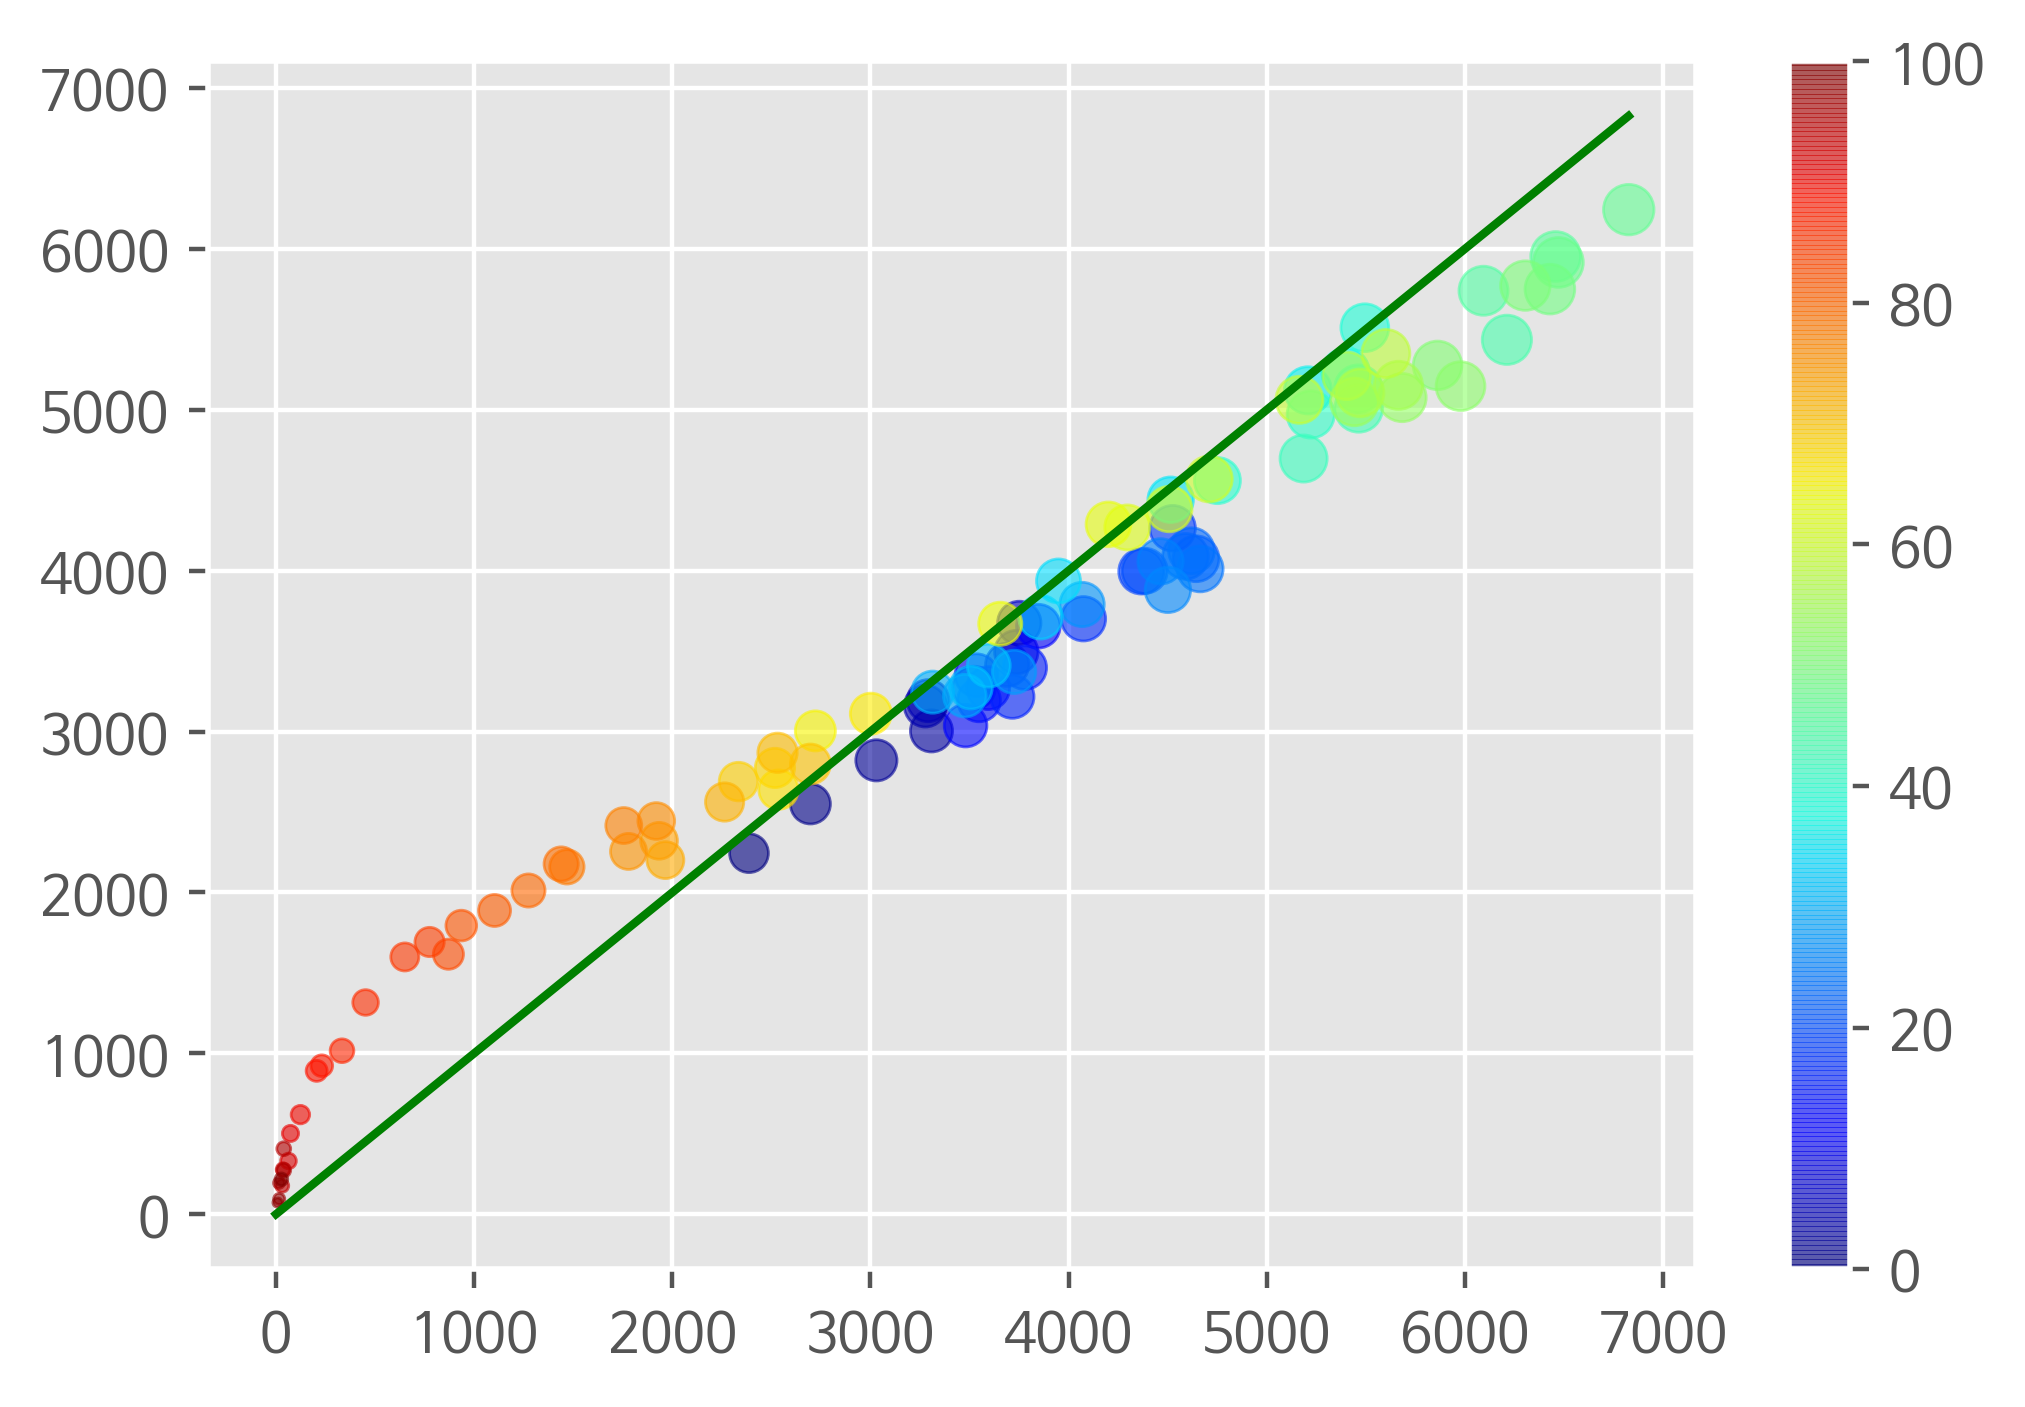

In [ ]:
# 라이브러리 불러오기
import csv
import matplotlib.pyplot as plt
import math # 수학라이브러리 불러오기 # 제곱근 구하는 sqrt() 함수를 사용하기 위해

# 파일 열기
f = open("/content/gender.csv", encoding="cp949")
data = csv.reader(f)
# next(data) # 헤더 넘기기

# 남자와 여자의 데이터 담을 리스트 생성
m = []
f = []
size = [] # 인구수 사이즈 리스트 변수 선언

# 지역 명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data :
  if name in row[0] :
    for i in row[3:104] : # 남성 데이터 : 3 ~ 103번 데이터 슬라이싱 -> 정수형으로 변환 -> 리스트에 저장
      m.append(int(i.replace(',','')))
      size.append(math.sqrt(int(i.replace(',','')))) # math.sqrt() 함수를 안쓰면 원의 크기가 너무 커진다
    for j in row[106:] : # 여성 데이터 : 106 ~ 끝까지 데이터 슬라이싱 -> 정수형으로 변환
      f.append(int(j.replace(',','')))
    break # 

print(m)
print(size) # size는 m의 제곱근
# 차트 설정
plt.figure(dpi=200) # 해상도 조절
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리

# 산점도 그래프로 남녀 데이터 표현하기
plt.scatter(m, f, s=size, c = range(101), cmap = 'jet', alpha = 0.6)
plt.plot(range(max(m)), range(max(m)), 'g') # 추세선 그리기 # 추세선은 x축 기준으로 그림
plt.colorbar()
plt.show()